## overview

In [1]:
# default package
import dataclasses as dc
import logging
import os
import pathlib
import random
import sys
import tempfile
from urllib.request import urlretrieve

import IPython

In [2]:
# third party package
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties
from tqdm import tqdm

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(), "../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [6]:
# graph setting
sns.set()
font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams["font.family"] = font_prop.get_name()

## 自己回帰
以下の式で表される時系列データです。
$$
Y_t=\phi_{1}Y_{t-1}+U_t+c
$$
$|\phi_{1}|<1$のとき、共分散定常過程になります。

このとき、両辺の期待値を取ることで、$\mu=\frac{c}{1-\phi_1}$となる。

In [7]:
def generate_ar(phi_1: float, c: float, u_sigma: float, y_pred: float, num: int = 500):
    y_series = np.empty(num)
    for i in range(num):
        u = np.random.normal(0, u_sigma)
        y_series[i] = phi_1 * y_pred + u + c
        y_pred = y_series[i]
    return y_series

INFO:__main__:mean:15.295288670250539,mean(theory):15.000000000000004
INFO:__main__:std:622.8918493513033,std(theory):625.0000000000002


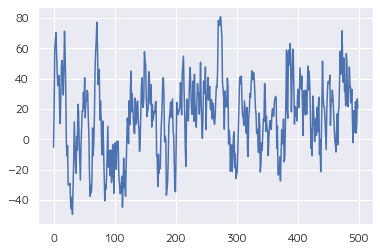

In [8]:
# phi_1=0.8
param_dict = {"phi_1": 0.8, "c": 3, "u_sigma": 15, "y_pred": 1}
y_series = generate_ar(**param_dict)
plt.plot(y_series)
logger.info(f"mean:{y_series.mean()},mean(theory):{param_dict['c']/(1-param_dict['phi_1'])}")
logger.info(f"std:{y_series.var()},std(theory):{param_dict['u_sigma']**2/(1-param_dict['phi_1']**2)}")

INFO:__main__:mean:1.425106163776329,mean(theory):1.6666666666666665
INFO:__main__:std:450.76015373908416,std(theory):625.0000000000002


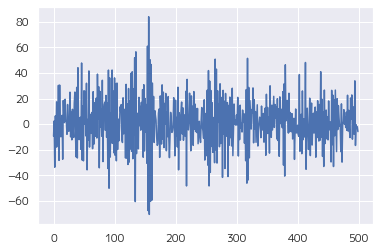

In [9]:
# phi_1=-0.8
param_dict = {"phi_1": -0.8, "c": 3, "u_sigma": 15, "y_pred": 1}
y_series = generate_ar(**param_dict)
plt.plot(y_series)
logger.info(f"mean:{y_series.mean()},mean(theory):{param_dict['c']/(1-param_dict['phi_1'])}")
logger.info(f"std:{y_series.var()},std(theory):{param_dict['u_sigma']**2/(1-param_dict['phi_1']**2)}")

INFO:__main__:mean:2.8793428287853904,mean(theory):3.0
INFO:__main__:std:218.0065432021064,std(theory):225.0


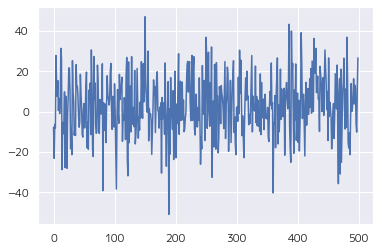

In [10]:
# phi_1=0
param_dict = {"phi_1": 0, "c": 3, "u_sigma": 15, "y_pred": 1}
y_series = generate_ar(**param_dict)
plt.plot(y_series)
logger.info(f"mean:{y_series.mean()},mean(theory):{param_dict['c']/(1-param_dict['phi_1'])}")
logger.info(f"std:{y_series.var()},std(theory):{param_dict['u_sigma']**2/(1-param_dict['phi_1']**2)}")